In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
df_LOCO = pd.read_json('LOCO.json')
df_LOCO.head()

,doc_id,URL,website,seeds,date,subcorpus,title,txt,txt_nwords,txt_nsentences,txt_nparagraphs,topic_k100,topic_k200,topic_k300,mention_conspiracy,conspiracy_representative,cosine_similarity,FB_shares,FB_comments,FB_reactions
0,C00001,https://humansarefree.com/2016/12/the-conspira...,humansarefree.com,michael.jackson.death,2016-12-30,conspiracy,The 'Conspiracy' Against Lt. Col. Michael Aqui...,"For those who don’t know, Michael Aquino was a...",4075,160,120,k100_24,k200_75,k300_192,8,0.0,0.1768,13.0,2.0,4.0
1,C00003,https://americandigitalnews.com/index.php/2017...,americandigitalnews.com,5g; barack.obama,2017-08-04,conspiracy,ATTORNEYS THAT ROBERT MUELLER HAS HIRED ON HIS...,LEAD INVESTIGATOR — ROBERT MUELLER — Mueller w...,940,67,35,k100_47,k200_80,k300_52,0,0.0,0.0878,0.0,0.0,0.0
2,C00004,https://911truth.org/whats-crazier-believing-t...,911truth.org,saddam.hussein,2009-04-08,conspiracy,"What's crazier, believing the U.S. orchestrate...","""…there can no longer be any serious argument ...",728,69,62,k100_57,k200_17,k300_284,10,0.0,0.1361,0.0,0.0,0.0
3,C00005,https://rense.com/general54/cancer-causing_vac...,rense.com,cancer,NaT,conspiracy,"Cancer-causing Vaccines, Polio, AIDS, and Monk...","The Global Polio Eradication Program, supporte...",5055,207,1,k100_82,k200_183,k300_107,4,0.0,0.1489,3.0,0.0,0.0
4,C00007,https://awarenessact.com/scientist-shares-impo...,awarenessact.com,climate.change; coronavirus,NaT,conspiracy,Scientist Shares Important Tips On Wearing Glo...,While a lot of people are trying to do their b...,403,13,5,k100_59,k200_58,k300_47,0,0.0,0.1401,26.0,4.0,55.0


In [3]:
df_conspiracy_sample = df_LOCO[df_LOCO['subcorpus'] == 'conspiracy'].sample(n=20000, random_state=42)
df_mainstream_sample = df_LOCO[df_LOCO['subcorpus'] == 'mainstream'].sample(n=20000, random_state=42)

# Merging the two samples into a single DataFrame for comparative analysis
df_LOCO_test = pd.concat([df_conspiracy_sample, df_mainstream_sample], axis=0).reset_index(drop=True)

# Displaying the head of the combined DataFrame to confirm the structure
df_LOCO_test.head()

,doc_id,URL,website,seeds,date,subcorpus,title,txt,txt_nwords,txt_nsentences,txt_nparagraphs,topic_k100,topic_k200,topic_k300,mention_conspiracy,conspiracy_representative,cosine_similarity,FB_shares,FB_comments,FB_reactions
0,C0020a,https://www.healthnutnews.com/robert-f-kennedy...,healthnutnews.com,big.pharma,2019-02-07,conspiracy,Robert F. Kennedy Jr explains how Big Pharma c...,"For many years, Robert F. Kennedy Jr. has been...",695,34,9,k100_90,k200_21,k300_21,0,1.0,0.2037,2191.0,488.0,4350.0
1,C04122,https://www.newstarget.com/2018-03-11-world-he...,newstarget.com,zika.virus,2018-03-11,conspiracy,World health chief stokes the panic fires by w...,World health chief stokes the panic fires by w...,613,30,12,k100_37,k200_159,k300_62,0,0.0,0.1347,0.0,0.0,0.0
2,C05120,https://www.healthnutnews.com/court-awards-969...,healthnutnews.com,vaccine,2015-02-09,conspiracy,"Court Awards $969,474 for MMR Vaccine Causing ...",Do vaccines cause autism? Many parents think s...,624,37,21,k100_90,k200_93,k300_140,0,0.0,0.1158,5.0,0.0,2.0
3,C0074b,https://geopolitics.co/2014/12/27/meet-the-pil...,geopolitics.co,mh370,2014-12-27,conspiracy,Meet The Pilot Who Shot Down Malaysian Boeing ...,"Normally, those pawns are to be eliminated lat...",1914,217,107,k100_51,k200_123,k300_187,0,1.0,0.1837,0.0,0.0,0.0
4,C04fca,https://vigilantcitizen.com/latestnews/megadet...,vigilantcitizen.com,new.world.order,2012-04-09,conspiracy,"Megadeth's ""New World Order"" and ""We the Peopl...",The iconic heavy metal band Megadeth never shi...,499,48,42,k100_58,k200_92,k300_38,0,0.0,0.1581,0.0,0.0,0.0


In [4]:
df_LOCO_test.tail()

,doc_id,URL,website,seeds,date,subcorpus,title,txt,txt_nwords,txt_nsentences,txt_nparagraphs,topic_k100,topic_k200,topic_k300,mention_conspiracy,conspiracy_representative,cosine_similarity,FB_shares,FB_comments,FB_reactions
39995,M1a7d6,https://www.webmd.com/drugs/2/drug-94048/multi...,webmd.com,5g,NaT,mainstream,Drugs & Medications,"Nausea, stomach upset, diarrhea, flushing and ...",184,14,8,k100_4,k200_164,k300_156,0,NaN,NaN,0.0,0.0,0.0
39996,M17321,https://www.ndtv.com/offbeat/george-w-bush-pas...,ndtv.com,george.bush,2018-09-02,mainstream,George W Bush Passing Candy To Michelle Obama ...,The cameras caught a sweet moment between form...,182,9,5,k100_19,k200_186,k300_146,0,NaN,NaN,24.0,12.0,621.0
39997,M15e06,https://www.foxnews.com/story/heather-mills-sa...,foxnews.com,paul.mccartney.death,2015-03-25,mainstream,"Heather Mills Says She Gets Death Threats, Acc...",Heather Mills McCartney accused Paul McCartney...,441,24,17,k100_17,k200_95,k300_88,0,NaN,NaN,0.0,0.0,0.0
39998,M0aa2c,https://www.telegraph.co.uk/news/2019/12/03/un...,telegraph.co.uk,climate.change,2019-12-03,mainstream,The UN's 'woke' climate change propaganda is a...,The climate change “emergency” is fake news. M...,201,9,3,k100_54,k200_23,k300_56,1,NaN,NaN,5240.0,12880.0,19009.0
39999,M1a006,https://people.com/books/linda-thompson-memoir...,people.com,elvis.presley,NaT,mainstream,Linda Thompson Memoir Explores Elvis Presley's...,In the course of her nearly five-year relation...,371,17,10,k100_22,k200_46,k300_69,0,NaN,NaN,0.0,0.0,0.0


# Comparitive analysis of textual traits of conspiracy vs mainstream documments

# capitalisation analysis


**using a function to create a new column that calculates the ratio of words appearing that contain more than one capital letter**

e.g. 
Hello == False
HELLO == True
HEllo == False

Is just checking against unconventional usage of capitlisation aligning with the trait of conspiracy being 'Excessive usage of capitalisation'

In [7]:
df_LOCO_test['cap_ratio'] = df_LOCO_test['txt'].apply(
    lambda x: sum(1 for word in x.split() if sum(char.isupper() for char in word) > 1) 
    / len(x.split()) if len(x.split()) > 0 else 0
)


In [8]:
df_LOCO_test.head()

,doc_id,URL,website,seeds,date,subcorpus,title,txt,txt_nwords,txt_nsentences,...,topic_k200,topic_k300,mention_conspiracy,conspiracy_representative,cosine_similarity,FB_shares,FB_comments,FB_reactions,num_questions,cap_ratio
0,C0020a,https://www.healthnutnews.com/robert-f-kennedy...,healthnutnews.com,big.pharma,2019-02-07,conspiracy,Robert F. Kennedy Jr explains how Big Pharma c...,"For many years, Robert F. Kennedy Jr. has been...",695,34,...,k200_21,k300_21,0,1.0,0.2037,2191.0,488.0,4350.0,1,0.014903
1,C04122,https://www.newstarget.com/2018-03-11-world-he...,newstarget.com,zika.virus,2018-03-11,conspiracy,World health chief stokes the panic fires by w...,World health chief stokes the panic fires by w...,613,30,...,k200_159,k300_62,0,0.0,0.1347,0.0,0.0,0.0,1,0.011647
2,C05120,https://www.healthnutnews.com/court-awards-969...,healthnutnews.com,vaccine,2015-02-09,conspiracy,"Court Awards $969,474 for MMR Vaccine Causing ...",Do vaccines cause autism? Many parents think s...,624,37,...,k200_93,k300_140,0,0.0,0.1158,5.0,0.0,2.0,4,0.013072
3,C0074b,https://geopolitics.co/2014/12/27/meet-the-pil...,geopolitics.co,mh370,2014-12-27,conspiracy,Meet The Pilot Who Shot Down Malaysian Boeing ...,"Normally, those pawns are to be eliminated lat...",1914,217,...,k200_123,k300_187,0,1.0,0.1837,0.0,0.0,0.0,49,0.020523
4,C04fca,https://vigilantcitizen.com/latestnews/megadet...,vigilantcitizen.com,new.world.order,2012-04-09,conspiracy,"Megadeth's ""New World Order"" and ""We the Peopl...",The iconic heavy metal band Megadeth never shi...,499,48,...,k200_92,k300_38,0,0.0,0.1581,0.0,0.0,0.0,2,0.002037


In [9]:
from scipy.stats import mannwhitneyu

# Assuming 'df_LOCO_test' is your DataFrame and it's already loaded in your environment.

# Separate the capitalization ratios for each subcorpus
conspiracy_cap_ratios = df_LOCO_test[df_LOCO_test['subcorpus'] == 'conspiracy']['cap_ratio']
mainstream_cap_ratios = df_LOCO_test[df_LOCO_test['subcorpus'] == 'mainstream']['cap_ratio']

# Perform the Mann-Whitney U test
u_statistic, p_value = mannwhitneyu(conspiracy_cap_ratios, mainstream_cap_ratios, alternative='two-sided')

print(f'Mann-Whitney U statistic: {u_statistic}')
print(f'P-value: {p_value}')

# Interpret the results
if p_value < 0.05:
    print('There is a statistically significant difference in capitalization ratios between conspiracy and mainstream documents.')
else:
    print('There is no statistically significant difference in capitalization ratios between conspiracy and mainstream documents.')


Mann-Whitney U statistic: 231046998.5
P-value: 2.790133180453138e-159
There is a statistically significant difference in capitalization ratios between conspiracy and mainstream documents.


In [7]:
df_LOCO_test['cap_ratio_title'] = df_LOCO_test['title'].apply(
    lambda x: sum(1 for word in x.split() if sum(char.isupper() for char in word) > 1) 
    / len(x.split()) if len(x.split()) > 0 else 0
)


In [11]:
df_LOCO_test.head()

,doc_id,URL,website,seeds,date,subcorpus,title,txt,txt_nwords,txt_nsentences,...,topic_k200,topic_k300,mention_conspiracy,conspiracy_representative,cosine_similarity,FB_shares,FB_comments,FB_reactions,cap_ratio,cap_ratio_title
0,C0020a,https://www.healthnutnews.com/robert-f-kennedy...,healthnutnews.com,big.pharma,2019-02-07,conspiracy,Robert F. Kennedy Jr explains how Big Pharma c...,"For many years, Robert F. Kennedy Jr. has been...",695,34,...,k200_21,k300_21,0,1.0,0.2037,2191.0,488.0,4350.0,0.014903,0.000000
1,C04122,https://www.newstarget.com/2018-03-11-world-he...,newstarget.com,zika.virus,2018-03-11,conspiracy,World health chief stokes the panic fires by w...,World health chief stokes the panic fires by w...,613,30,...,k200_159,k300_62,0,0.0,0.1347,0.0,0.0,0.0,0.011647,0.052632
2,C05120,https://www.healthnutnews.com/court-awards-969...,healthnutnews.com,vaccine,2015-02-09,conspiracy,"Court Awards $969,474 for MMR Vaccine Causing ...",Do vaccines cause autism? Many parents think s...,624,37,...,k200_93,k300_140,0,0.0,0.1158,5.0,0.0,2.0,0.013072,0.111111
3,C0074b,https://geopolitics.co/2014/12/27/meet-the-pil...,geopolitics.co,mh370,2014-12-27,conspiracy,Meet The Pilot Who Shot Down Malaysian Boeing ...,"Normally, those pawns are to be eliminated lat...",1914,217,...,k200_123,k300_187,0,1.0,0.1837,0.0,0.0,0.0,0.020523,0.111111
4,C04fca,https://vigilantcitizen.com/latestnews/megadet...,vigilantcitizen.com,new.world.order,2012-04-09,conspiracy,"Megadeth's ""New World Order"" and ""We the Peopl...",The iconic heavy metal band Megadeth never shi...,499,48,...,k200_92,k300_38,0,0.0,0.1581,0.0,0.0,0.0,0.002037,0.000000


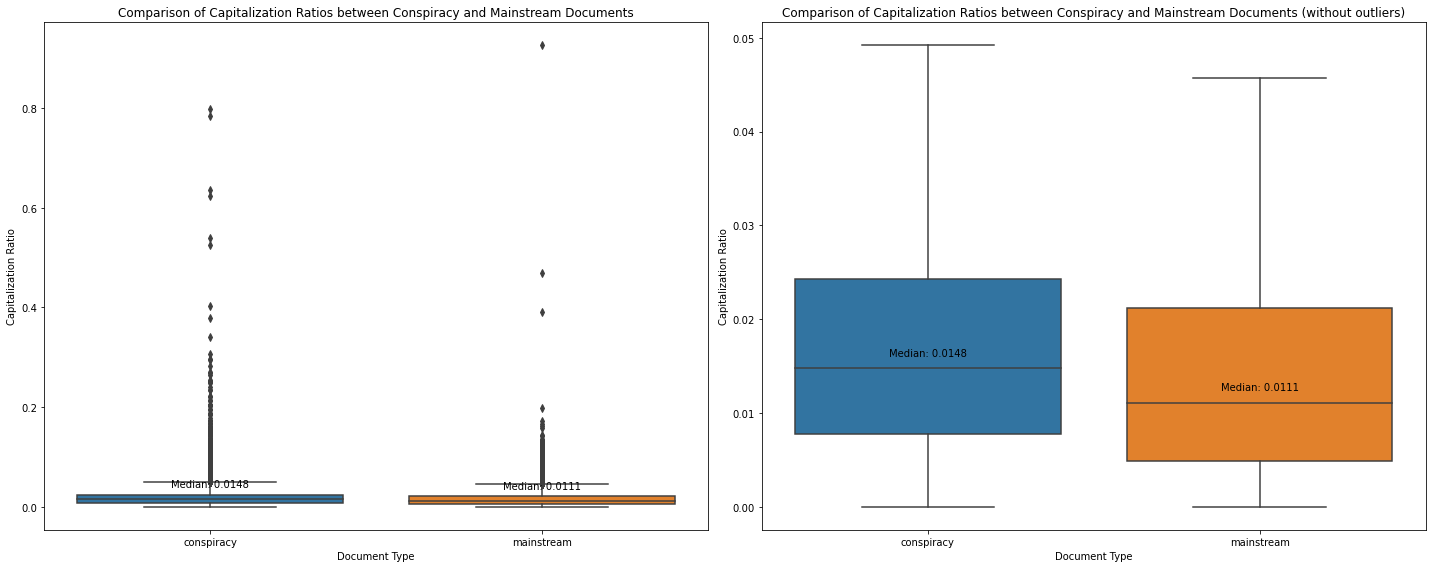

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the median values just once, as they are used in both plots
median_conspiracy = df_LOCO_test[df_LOCO_test['subcorpus'] == 'conspiracy']['cap_ratio'].median()
median_mainstream = df_LOCO_test[df_LOCO_test['subcorpus'] == 'mainstream']['cap_ratio'].median()

# Get the positions of the categories for annotations
category_positions = {category: position for position, category in enumerate(df_LOCO_test['subcorpus'].unique())}

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Plot 1
sns.boxplot(x='subcorpus', y='cap_ratio', data=df_LOCO_test, ax=axes[0])
axes[0].set_title('Comparison of Capitalization Ratios between Conspiracy and Mainstream Documents')
axes[0].set_xlabel('Document Type')
axes[0].set_ylabel('Capitalization Ratio')
axes[0].annotate(f'Median: {median_conspiracy:.4f}', 
                 xy=(category_positions['conspiracy'], median_conspiracy),
                 xytext=(0, 10), 
                 textcoords='offset points', 
                 ha='center', 
                 va='bottom')
axes[0].annotate(f'Median: {median_mainstream:.4f}', 
                 xy=(category_positions['mainstream'], median_mainstream),
                 xytext=(0, 10), 
                 textcoords='offset points', 
                 ha='center', 
                 va='bottom')

# Plot 2
sns.boxplot(x='subcorpus', y='cap_ratio', data=df_LOCO_test, showfliers=False, ax=axes[1])
axes[1].set_title('Comparison of Capitalization Ratios between Conspiracy and Mainstream Documents (without outliers)')
axes[1].set_xlabel('Document Type')
axes[1].set_ylabel('Capitalization Ratio')
axes[1].annotate(f'Median: {median_conspiracy:.4f}', 
                 xy=(category_positions['conspiracy'], median_conspiracy),
                 xytext=(0, 10), 
                 textcoords='offset points', 
                 ha='center', 
                 va='bottom')
axes[1].annotate(f'Median: {median_mainstream:.4f}', 
                 xy=(category_positions['mainstream'], median_mainstream),
                 xytext=(0, 10), 
                 textcoords='offset points', 
                 ha='center', 
                 va='bottom')

# Adjust layout for better visibility
plt.tight_layout()

# Show the plots
plt.show()


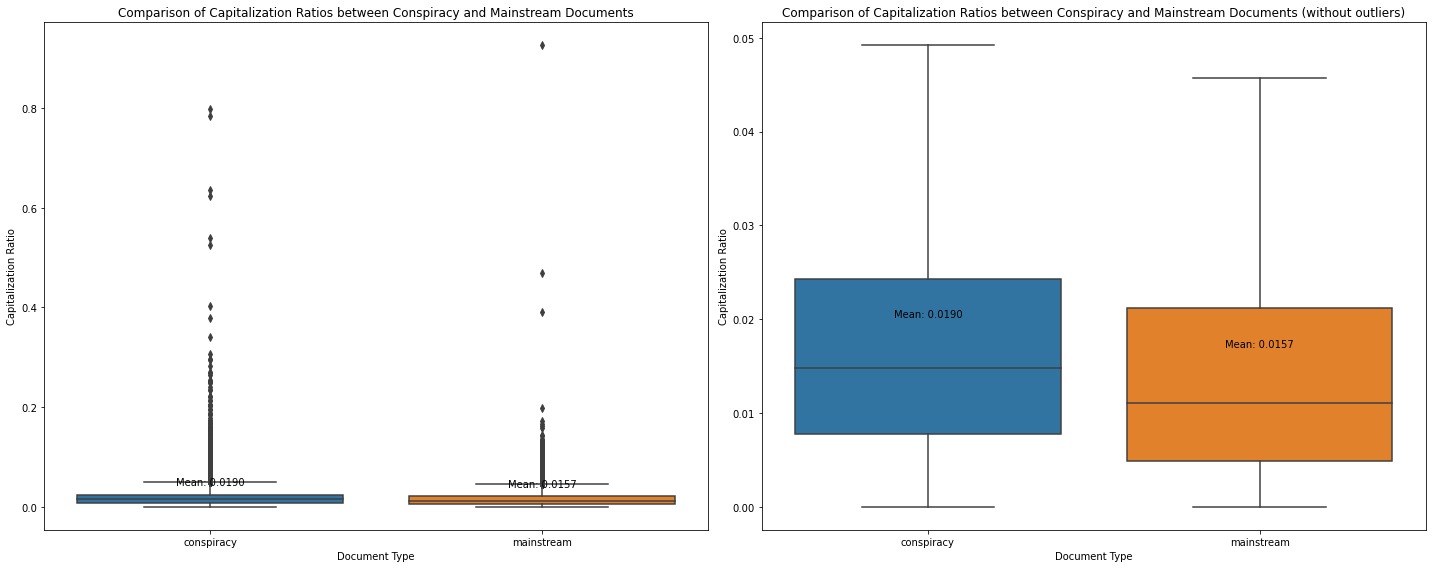

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the median values just once, as they are used in both plots
mean_conspiracy = df_LOCO_test[df_LOCO_test['subcorpus'] == 'conspiracy']['cap_ratio'].mean()
mean_mainstream = df_LOCO_test[df_LOCO_test['subcorpus'] == 'mainstream']['cap_ratio'].mean()

# Get the positions of the categories for annotations
category_positions = {category: position for position, category in enumerate(df_LOCO_test['subcorpus'].unique())}

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Plot 1
sns.boxplot(x='subcorpus', y='cap_ratio', data=df_LOCO_test, ax=axes[0])
axes[0].set_title('Comparison of Capitalization Ratios between Conspiracy and Mainstream Documents')
axes[0].set_xlabel('Document Type')
axes[0].set_ylabel('Capitalization Ratio')
axes[0].annotate(f'Mean: {mean_conspiracy:.4f}', 
                 xy=(category_positions['conspiracy'], mean_conspiracy),
                 xytext=(0, 10), 
                 textcoords='offset points', 
                 ha='center', 
                 va='bottom')
axes[0].annotate(f'Mean: {mean_mainstream:.4f}', 
                 xy=(category_positions['mainstream'], mean_mainstream),
                 xytext=(0, 10), 
                 textcoords='offset points', 
                 ha='center', 
                 va='bottom')

# Plot 2
sns.boxplot(x='subcorpus', y='cap_ratio', data=df_LOCO_test, showfliers=False, ax=axes[1])
axes[1].set_title('Comparison of Capitalization Ratios between Conspiracy and Mainstream Documents (without outliers)')
axes[1].set_xlabel('Document Type')
axes[1].set_ylabel('Capitalization Ratio')
axes[1].annotate(f'Mean: {mean_conspiracy:.4f}', 
                 xy=(category_positions['conspiracy'], mean_conspiracy),
                 xytext=(0, 10), 
                 textcoords='offset points', 
                 ha='center', 
                 va='bottom')
axes[1].annotate(f'Mean: {mean_mainstream:.4f}', 
                 xy=(category_positions['mainstream'], mean_mainstream),
                 xytext=(0, 10), 
                 textcoords='offset points', 
                 ha='center', 
                 va='bottom')

# Adjust layout for better visibility
plt.tight_layout()

# Show the plots
plt.show()


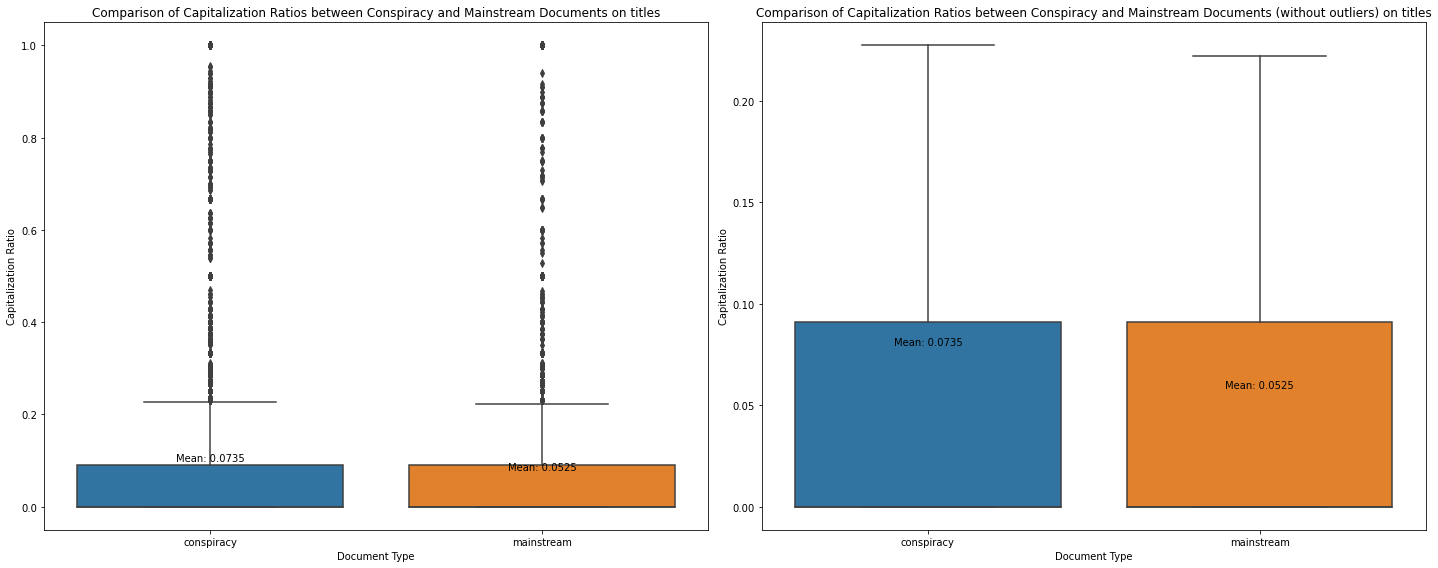

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the median values just once, as they are used in both plots
mean_conspiracy_title = df_LOCO_test[df_LOCO_test['subcorpus'] == 'conspiracy']['cap_ratio_title'].mean()
mean_mainstream_title = df_LOCO_test[df_LOCO_test['subcorpus'] == 'mainstream']['cap_ratio_title'].mean()

# Get the positions of the categories for annotations
category_positions = {category: position for position, category in enumerate(df_LOCO_test['subcorpus'].unique())}

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Plot 1
sns.boxplot(x='subcorpus', y='cap_ratio_title', data=df_LOCO_test, ax=axes[0])
axes[0].set_title('Comparison of Capitalization Ratios between Conspiracy and Mainstream Documents on titles')
axes[0].set_xlabel('Document Type')
axes[0].set_ylabel('Capitalization Ratio')
axes[0].annotate(f'Mean: {mean_conspiracy_title:.4f}', 
                 xy=(category_positions['conspiracy'], mean_conspiracy_title),
                 xytext=(0, 10), 
                 textcoords='offset points', 
                 ha='center', 
                 va='bottom')
axes[0].annotate(f'Mean: {mean_mainstream_title:.4f}', 
                 xy=(category_positions['mainstream'], mean_mainstream_title),
                 xytext=(0, 10), 
                 textcoords='offset points', 
                 ha='center', 
                 va='bottom')

# Plot 2
sns.boxplot(x='subcorpus', y='cap_ratio_title', data=df_LOCO_test, showfliers=False, ax=axes[1])
axes[1].set_title('Comparison of Capitalization Ratios between Conspiracy and Mainstream Documents (without outliers) on titles')
axes[1].set_xlabel('Document Type')
axes[1].set_ylabel('Capitalization Ratio')
axes[1].annotate(f'Mean: {mean_conspiracy_title:.4f}', 
                 xy=(category_positions['conspiracy'], mean_conspiracy_title),
                 xytext=(0, 10), 
                 textcoords='offset points', 
                 ha='center', 
                 va='bottom')
axes[1].annotate(f'Mean: {mean_mainstream_title:.4f}', 
                 xy=(category_positions['mainstream'], mean_mainstream_title),
                 xytext=(0, 10), 
                 textcoords='offset points', 
                 ha='center', 
                 va='bottom')

# Adjust layout for better visibility
plt.tight_layout()

# Show the plots
plt.show()


**Comparisons affirm trait that conspiracy documments have higher amounts of usages of capitalisation**


# Next is comparison of unconventional usage of punctuation

In [23]:
from string import punctuation
from scipy.stats import ttest_ind

# Function to calculate the punctuation ratio
def punctuation_ratio(text):
    punct_count = sum(1 for char in text if char in punctuation)
    return punct_count / len(text) if len(text) > 0 else 0

# Applying the function to the 'txt' column to calculate the ratio of punctuation
df_LOCO_test['punct_ratio'] = df_LOCO_test['txt'].apply(punctuation_ratio)

# Grouping by 'subcorpus' and calculating means
punct_means = df_LOCO_test.groupby('subcorpus')['punct_ratio'].mean()

# Extracting the groups for the t-test
conspiracy_punct = df_LOCO_test[df_LOCO_test['subcorpus'] == 'conspiracy']['punct_ratio']
mainstream_punct = df_LOCO_test[df_LOCO_test['subcorpus'] == 'mainstream']['punct_ratio']

# Performing a t-test between the two groups
t_stat, p_value = ttest_ind(conspiracy_punct, mainstream_punct)

print(f"Conspiracy punctuation mean: {punct_means['conspiracy']}")
print(f"Mainstream punctuation mean: {punct_means['mainstream']}")
print(f"T-statistic: {t_stat}, P-value: {p_value}")

Conspiracy punctuation mean: 0.023318948558005374
Mainstream punctuation mean: 0.024904798645522575
T-statistic: -22.225607812262957, P-value: 8.87071413775584e-109


**Punctuation Mean:**

on average, 2.33% of the characters in the conspiracy texts are punctuation marks.

on average, 2.49% of the characters in the mainstream texts are punctuation marks.

**T-statistic:**

A t-statistic far from zero (either positive or negative) suggests a significant difference between the groups. The negative sign indicates that the mean of the first group ('conspiracy') is less than the mean of the second group ('mainstream').
(previous value was -31)

**P-value:**

The p-value is very small (far less than 0.05), which suggests that the difference in punctuation ratios between 'conspiracy' and 'mainstream' documents is statistically significant.
Specifically, a p-value of 8.871×10^-109 which is essentially zero, meaning there is an extremely low probability that the observed difference is due to random chance.


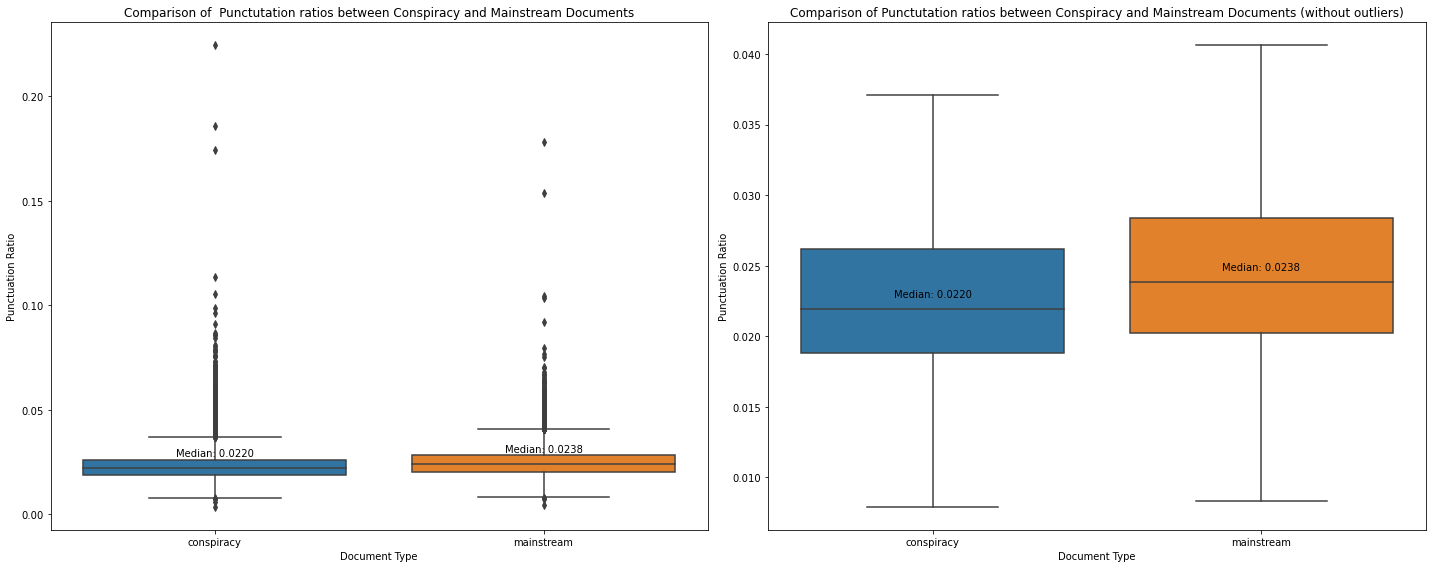

In [48]:

# Calculate the median values for the punctuation ratio within each subcorpus category
median_conspiracy = df_LOCO_test[df_LOCO_test['subcorpus'] == 'conspiracy']['punct_ratio'].median()
median_mainstream = df_LOCO_test[df_LOCO_test['subcorpus'] == 'mainstream']['punct_ratio'].median()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

#outlier plot
sns.boxplot(x='subcorpus', y='punct_ratio', data=df_LOCO_test, ax=axes[0])
axes[0].set_title('Comparison of  Punctutation ratios between Conspiracy and Mainstream Documents')
axes[0].set_xlabel('Document Type')
axes[0].set_ylabel('Punctuation Ratio')
axes[0].annotate(f'Median: {median_conspiracy:.4f}', 
             xy=(category_positions['conspiracy'], median_conspiracy),
             xytext=(0, 10), 
             textcoords='offset points', 
             ha='center', 
             va='bottom')

axes[0].annotate(f'Median: {median_mainstream:.4f}', 
             xy=(category_positions['mainstream'], median_mainstream),
             xytext=(0, 10), 
             textcoords='offset points', 
             ha='center', 
             va='bottom')

# No outlier plot
sns.boxplot(x='subcorpus', y='punct_ratio', data=df_LOCO_test, showfliers=False, ax=axes[1])
axes[1].set_title('Comparison of Punctutation ratios between Conspiracy and Mainstream Documents (without outliers)')
axes[1].set_xlabel('Document Type')
axes[1].set_ylabel('Punctuation Ratio')
axes[1].annotate(f'Median: {median_conspiracy:.4f}', 
             xy=(category_positions['conspiracy'], median_conspiracy),
             xytext=(0, 10), 
             textcoords='offset points', 
             ha='center', 
             va='bottom')

axes[1].annotate(f'Median: {median_mainstream:.4f}', 
             xy=(category_positions['mainstream'], median_mainstream),
             xytext=(0, 10), 
             textcoords='offset points', 
             ha='center', 
             va='bottom')

plt.tight_layout()
plt.show()

# What is conventional?

**The statistical significance is still up for question as what does constitute as 'conventional'**

Using 'language_tool_python' to check against common punctuation conventions and rules to see if either group reports going against the standardised rules

In [49]:
!pip install language_tool_python

In [6]:
# Randomly sample 500 instances from each
# Separate DataFrames for each subcorpus category
df_conspiracy = df_LOCO_test[df_LOCO_test['subcorpus'] == 'conspiracy'].sample(n=20000, random_state=1)
df_mainstream = df_LOCO_test[df_LOCO_test['subcorpus'] == 'mainstream'].sample(n=20000, random_state=1)

# Concatenate the two samples
df_conventional_punc = pd.concat([df_conspiracy, df_mainstream])

df_conventional_punc = df_conventional_punc[['doc_id', 'URL', 'subcorpus', 'title', 'txt']]

df_conventional_punc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 11456 to 20235
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   doc_id     40000 non-null  object
 1   URL        40000 non-null  object
 2   subcorpus  40000 non-null  object
 3   title      40000 non-null  object
 4   txt        40000 non-null  object
dtypes: object(5)
memory usage: 1.8+ MB


In [10]:
import language_tool_python
import pandas as pd
from tqdm import tqdm
import time

tool = language_tool_python.LanguageTool('en-US')

punctuation_issues = []

for index, row in tqdm(df_conventional_punc.iterrows(), total=df_conventional_punc.shape[0]):
    text = row['txt']
    subcorpus = row['subcorpus']
    attempts = 0
    success = False

    while not success and attempts < 3:  # Retry up to 3 times
        try:
            matches = tool.check(text)
            success = True  # If no exception, set success to True
        except Exception as e:  # Catch any kind of exception
            attempts += 1
            time.sleep(1)  # Wait a second before retrying
            print(f"Error on attempt {attempts} for Document ID {row['doc_id']}: {e}")

    if success:
        for match in matches:
            if match.ruleId in ['PUNCTUATION_RULE', 'COMMA_PARENTHESIS_WHITESPACE', 'SENTENCE_WHITESPACE']:
                punctuation_issues.append({
                    'doc_id': row['doc_id'],
                    'subcorpus': subcorpus,
                    'issue': match.ruleId,
                    'context': match.context
                })
    else:
        print(f"Skipping entry due to repeated errors: Document ID {row['doc_id']}")

issues_df = pd.DataFrame(punctuation_issues)


 10%|███████                                                                 | 3907/40000 [1:29:38<11:49:59,  1.18s/it]

Error on attempt 1 for Document ID C01db8: Expecting value: line 1 column 1 (char 0)
Error on attempt 2 for Document ID C01db8: Expecting value: line 1 column 1 (char 0)


 10%|███████                                                                 | 3908/40000 [1:29:48<35:47:44,  3.57s/it]

Error on attempt 3 for Document ID C01db8: Expecting value: line 1 column 1 (char 0)
Skipping entry due to repeated errors: Document ID C01db8


100%|██████████████████████████████████████████████████████████████████████████| 40000/40000 [9:12:52<00:00,  1.21it/s]


PUNCTUATION_RULE: General rule for punctuation errors.


COMMA_PARENTHESIS_WHITESPACE: Specific rule for whitespace usage with commas and parentheses.


SENTENCE_WHITESPACE: Rule for the correct usage of whitespaces in sentences.

Each rule has its criteria for identifying errors, based on the syntax and punctuation standards of the language - in this case american english.



In [11]:
issues_df.groupby('subcorpus')['doc_id'].nunique()


subcorpus
conspiracy    5784
mainstream    2953
Name: doc_id, dtype: int64

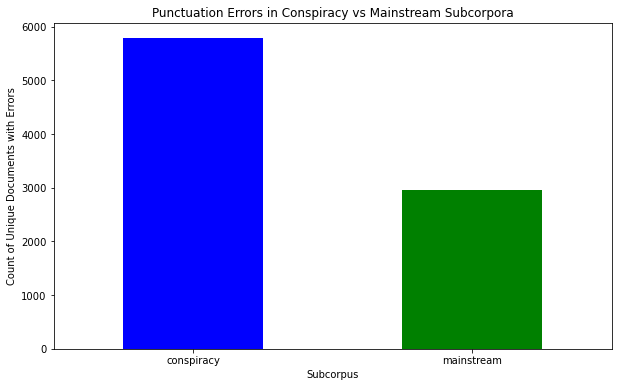

In [12]:
punctuation_error_count = issues_df.groupby('subcorpus')['doc_id'].nunique()

# Plotting
plt.figure(figsize=(10, 6))
punctuation_error_count.plot(kind='bar', color=['blue', 'green'])
plt.title('Punctuation Errors in Conspiracy vs Mainstream Subcorpora')
plt.xlabel('Subcorpus')
plt.ylabel('Count of Unique Documents with Errors')
plt.xticks(rotation=0)
plt.show()

In [13]:
issues_df.head()

,doc_id,subcorpus,issue,context
0,C04674,conspiracy,COMMA_PARENTHESIS_WHITESPACE,"...nted immigrants who receive legal status,Th..."
1,C02c6f,conspiracy,SENTENCE_WHITESPACE,"""The News You Need Today…For The World You’ll ..."
2,C02c6f,conspiracy,SENTENCE_WHITESPACE,...o its original source at WhatDoesItMean.Com...
3,C02c6f,conspiracy,COMMA_PARENTHESIS_WHITESPACE,"...refers to Russian citadels, including in , ..."
4,C06d24,conspiracy,COMMA_PARENTHESIS_WHITESPACE,...ess in the investigation was sacked.(1) [ h...


In [14]:
issues_df.groupby(['subcorpus', 'doc_id']).size().reset_index(name='count')

,subcorpus,doc_id,count
0,conspiracy,C00003,2
1,conspiracy,C00005,6
2,conspiracy,C0000f,32
3,conspiracy,C00018,2
4,conspiracy,C00019,2
...,...,...,...
8732,mainstream,M20f1d,3
8733,mainstream,M20f1e,2
8734,mainstream,M20f75,1
8735,mainstream,M20f78,4


In [15]:
counted_issues_df = issues_df.groupby(['subcorpus', 'doc_id']).size().reset_index(name='count')
counted_issues_df.head()

,subcorpus,doc_id,count
0,conspiracy,C00003,2
1,conspiracy,C00005,6
2,conspiracy,C0000f,32
3,conspiracy,C00018,2
4,conspiracy,C00019,2


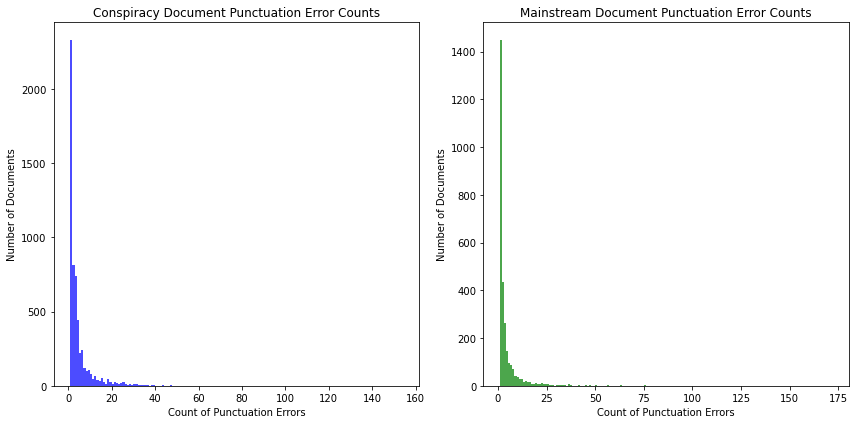

In [16]:
conspiracy_df = counted_issues_df[counted_issues_df['subcorpus'] == 'conspiracy']['count']
mainstream_df = counted_issues_df[counted_issues_df['subcorpus'] == 'mainstream']['count']

# Plotting two separate histograms for each subcorpus
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(conspiracy_df, bins=range(1, conspiracy_df.max() + 2), color='blue', alpha=0.7)
plt.title('Conspiracy Document Punctuation Error Counts')
plt.xlabel('Count of Punctuation Errors')
plt.ylabel('Number of Documents')

plt.subplot(1, 2, 2)
plt.hist(mainstream_df, bins=range(1, mainstream_df.max() + 2), color='green', alpha=0.7)
plt.title('Mainstream Document Punctuation Error Counts')
plt.xlabel('Count of Punctuation Errors')
plt.ylabel('Number of Documents')

plt.tight_layout()
plt.show()

**The trend that conspiracy articles follow conventional punctuation rules less often than mainstream**


# Looking at differences in sentance lengths of conspiracy vs mainstream

In [50]:
df_LOCO_test['avg_sentence_length'] = df_LOCO_test['txt_nwords'] / df_LOCO_test['txt_nsentences']
df_LOCO_test.head()

,doc_id,URL,website,seeds,date,subcorpus,title,txt,txt_nwords,txt_nsentences,...,topic_k300,mention_conspiracy,conspiracy_representative,cosine_similarity,FB_shares,FB_comments,FB_reactions,cap_ratio,punct_ratio,avg_sentence_length
0,C0020a,https://www.healthnutnews.com/robert-f-kennedy...,healthnutnews.com,big.pharma,2019-02-07,conspiracy,Robert F. Kennedy Jr explains how Big Pharma c...,"For many years, Robert F. Kennedy Jr. has been...",695,34,...,k300_21,0,1.0,0.2037,2191.0,488.0,4350.0,0.014903,0.020957,20.441176
1,C04122,https://www.newstarget.com/2018-03-11-world-he...,newstarget.com,zika.virus,2018-03-11,conspiracy,World health chief stokes the panic fires by w...,World health chief stokes the panic fires by w...,613,30,...,k300_62,0,0.0,0.1347,0.0,0.0,0.0,0.011647,0.026933,20.433333
2,C05120,https://www.healthnutnews.com/court-awards-969...,healthnutnews.com,vaccine,2015-02-09,conspiracy,"Court Awards $969,474 for MMR Vaccine Causing ...",Do vaccines cause autism? Many parents think s...,624,37,...,k300_140,0,0.0,0.1158,5.0,0.0,2.0,0.013072,0.021919,16.864865
3,C0074b,https://geopolitics.co/2014/12/27/meet-the-pil...,geopolitics.co,mh370,2014-12-27,conspiracy,Meet The Pilot Who Shot Down Malaysian Boeing ...,"Normally, those pawns are to be eliminated lat...",1914,217,...,k300_187,0,1.0,0.1837,0.0,0.0,0.0,0.020523,0.028181,8.820276
4,C04fca,https://vigilantcitizen.com/latestnews/megadet...,vigilantcitizen.com,new.world.order,2012-04-09,conspiracy,"Megadeth's ""New World Order"" and ""We the Peopl...",The iconic heavy metal band Megadeth never shi...,499,48,...,k300_38,0,0.0,0.1581,0.0,0.0,0.0,0.002037,0.015212,10.395833


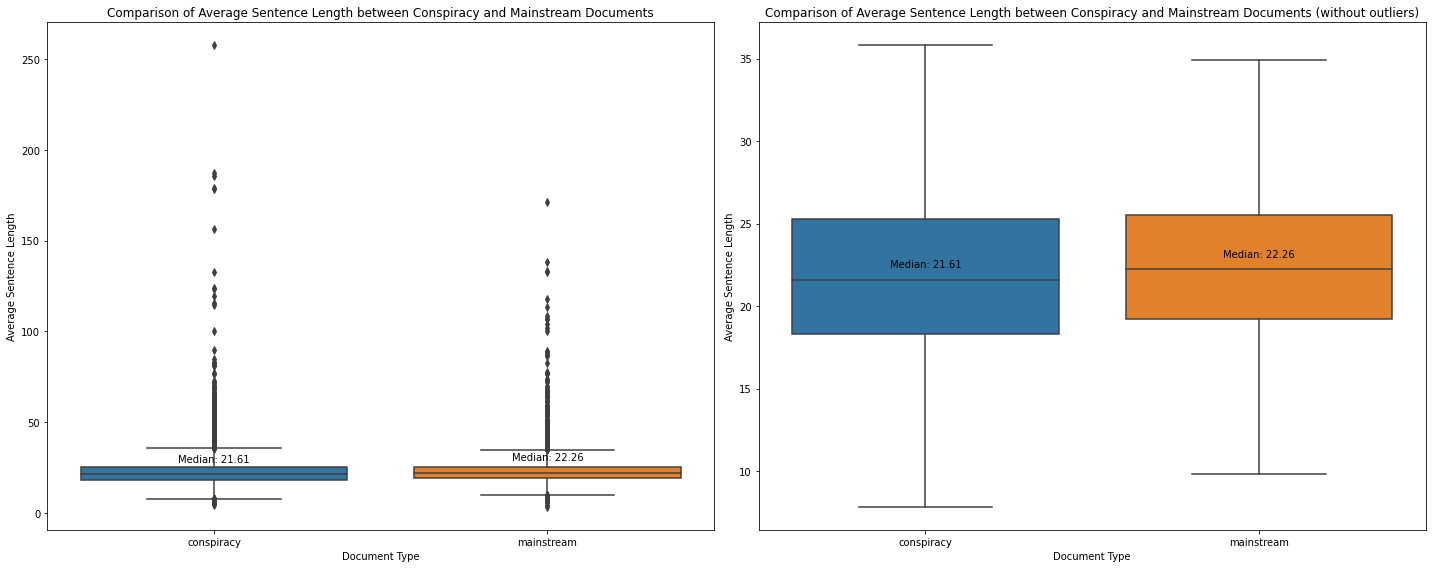

In [55]:
median_conspiracy = df_LOCO_test[df_LOCO_test['subcorpus'] == 'conspiracy']['avg_sentence_length'].median()
median_mainstream = df_LOCO_test[df_LOCO_test['subcorpus'] == 'mainstream']['avg_sentence_length'].median()

# Get the positions of the categories for annotations
category_positions = {category: position for position, category in enumerate(df_LOCO_test['subcorpus'].unique())}

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Plot 1
sns.boxplot(x='subcorpus', y='avg_sentence_length', data=df_LOCO_test, ax=axes[0])
axes[0].set_title('Comparison of Average Sentence Length between Conspiracy and Mainstream Documents')
axes[0].set_xlabel('Document Type')
axes[0].set_ylabel('Average Sentence Length')
axes[0].annotate(f'Median: {median_conspiracy:.2f}', 
                 xy=(category_positions['conspiracy'], median_conspiracy),
                 xytext=(0, 10), 
                 textcoords='offset points', 
                 ha='center', 
                 va='bottom')
axes[0].annotate(f'Median: {median_mainstream:.2f}', 
                 xy=(category_positions['mainstream'], median_mainstream),
                 xytext=(0, 10), 
                 textcoords='offset points', 
                 ha='center', 
                 va='bottom')

# Plot 2
sns.boxplot(x='subcorpus', y='avg_sentence_length', data=df_LOCO_test, showfliers=False, ax=axes[1])
axes[1].set_title('Comparison of Average Sentence Length between Conspiracy and Mainstream Documents (without outliers)')
axes[1].set_xlabel('Document Type')
axes[1].set_ylabel('Average Sentence Length')
axes[1].annotate(f'Median: {median_conspiracy:.2f}', 
                 xy=(category_positions['conspiracy'], median_conspiracy),
                 xytext=(0, 10), 
                 textcoords='offset points', 
                 ha='center', 
                 va='bottom')
axes[1].annotate(f'Median: {median_mainstream:.2f}', 
                 xy=(category_positions['mainstream'], median_mainstream),
                 xytext=(0, 10), 
                 textcoords='offset points', 
                 ha='center', 
                 va='bottom')

# Adjust layout for better visibility
plt.tight_layout()

# Show the plots
plt.show()

**Pretty much negligible difference which then makes the completely different usage of punctuation, and capitlisaation in sentances that much more interesting**

# Comparison of questions asked in conspiracy vs mainstream

In [4]:
df_LOCO_test['num_questions'] = df_LOCO_test['txt'].apply(lambda text: text.count('?'))

df_LOCO_test.head()

,doc_id,URL,website,seeds,date,subcorpus,title,txt,txt_nwords,txt_nsentences,...,topic_k100,topic_k200,topic_k300,mention_conspiracy,conspiracy_representative,cosine_similarity,FB_shares,FB_comments,FB_reactions,num_questions
0,C0020a,https://www.healthnutnews.com/robert-f-kennedy...,healthnutnews.com,big.pharma,2019-02-07,conspiracy,Robert F. Kennedy Jr explains how Big Pharma c...,"For many years, Robert F. Kennedy Jr. has been...",695,34,...,k100_90,k200_21,k300_21,0,1.0,0.2037,2191.0,488.0,4350.0,1
1,C04122,https://www.newstarget.com/2018-03-11-world-he...,newstarget.com,zika.virus,2018-03-11,conspiracy,World health chief stokes the panic fires by w...,World health chief stokes the panic fires by w...,613,30,...,k100_37,k200_159,k300_62,0,0.0,0.1347,0.0,0.0,0.0,1
2,C05120,https://www.healthnutnews.com/court-awards-969...,healthnutnews.com,vaccine,2015-02-09,conspiracy,"Court Awards $969,474 for MMR Vaccine Causing ...",Do vaccines cause autism? Many parents think s...,624,37,...,k100_90,k200_93,k300_140,0,0.0,0.1158,5.0,0.0,2.0,4
3,C0074b,https://geopolitics.co/2014/12/27/meet-the-pil...,geopolitics.co,mh370,2014-12-27,conspiracy,Meet The Pilot Who Shot Down Malaysian Boeing ...,"Normally, those pawns are to be eliminated lat...",1914,217,...,k100_51,k200_123,k300_187,0,1.0,0.1837,0.0,0.0,0.0,49
4,C04fca,https://vigilantcitizen.com/latestnews/megadet...,vigilantcitizen.com,new.world.order,2012-04-09,conspiracy,"Megadeth's ""New World Order"" and ""We the Peopl...",The iconic heavy metal band Megadeth never shi...,499,48,...,k100_58,k200_92,k300_38,0,0.0,0.1581,0.0,0.0,0.0,2


In [6]:
mainstream_df = df_LOCO_test[df_LOCO_test['subcorpus'] == 'mainstream']
conspiracy_df = df_LOCO_test[df_LOCO_test['subcorpus'] == 'conspiracy']

# Find the top 5 'num_questions' values for each subcorpus
top5_mainstream_questions = mainstream_df['num_questions'].nlargest(5)
top5_conspiracy_questions = conspiracy_df['num_questions'].nlargest(5)

# Print the results
print("Top 5 'num_questions' in mainstream subcorpus:", top5_mainstream_questions.values)
print("Top 5 'num_questions' in conspiracy subcorpus:", top5_conspiracy_questions.values)

Top 5 'num_questions' in mainstream subcorpus: [166 108  89  85  83]
Top 5 'num_questions' in conspiracy subcorpus: [473 423 301 246 160]


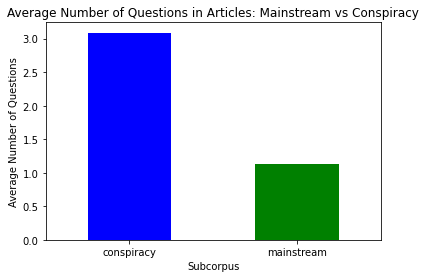

In [57]:
grouped_data = df_LOCO_test.groupby('subcorpus')['num_questions'].mean()

# Plotting
grouped_data.plot(kind='bar', color=['blue', 'green'])
plt.title('Average Number of Questions in Articles: Mainstream vs Conspiracy')
plt.xlabel('Subcorpus')
plt.ylabel('Average Number of Questions')
plt.xticks(rotation=0)  # Rotate labels to make them readable
plt.show()

**conspiracy articles do in fact ask more questions** 

# do either subgroup mention conspiracy theories more than the other

Firstly lets create a list of all the conspiracy seeds that are mentioned in the df_LOCO column

In [68]:
all_words = [word for sublist in df_LOCO['seeds'].str.split(';') for word in sublist]

# Removing duplicates by converting the list to a set and back to a list
unique_words = list(set(all_words))

print(unique_words)

[' cancer', 'big.foot', 'covid.19', 'mh370', ' barack.obama', 'cancer', 'fluoride.water', ' michael.jackson.death', 'paul.mccartney.death', ' climate.change', ' coronavirus', 'illuminati', ' bill.gates', 'mind.control', ' mh370', ' zika.virus', ' jfk.assassination', ' sandy.hook', 'jfk.assassination', ' elvis.presley', 'alien', ' princess.diana.death', 'climate.change', 'michael.jackson.death', 'moon.landing', 'population.control', 'aids', ' cia.cocaine', 'big.pharma', ' new.world.order', ' pharmaceutical.industry', ' aids', ' osama.bin.laden', ' moon.landing', 'cia.cocaine', 'barack.obama', 'september.11.attack', ' paul.mccartney.death', ' mind.control', ' drug.companies', ' big.foot', 'princess.diana.death', 'pharmaceutical.industry', 'zika.virus', ' elvis.death', 'drug.companies', ' george.soros', ' george.bush', ' alien', ' fluoride.water', 'sandy.hook', 'george.bush', ' jonestown.suicide', ' big.pharma', ' chemtrails', ' reptilian', ' vaccine.covid', 'jonestown.suicide', ' flat.ea

In [78]:
unique_words = [word.replace('.', ' ') for word in unique_words]


In [79]:
print(unique_words)

[' cancer', 'big foot', 'covid 19', 'mh370', ' barack obama', 'cancer', 'fluoride water', ' michael jackson death', 'paul mccartney death', ' climate change', ' coronavirus', 'illuminati', ' bill gates', 'mind control', ' mh370', ' zika virus', ' jfk assassination', ' sandy hook', 'jfk assassination', ' elvis presley', 'alien', ' princess diana death', 'climate change', 'michael jackson death', 'moon landing', 'population control', 'aids', ' cia cocaine', 'big pharma', ' new world order', ' pharmaceutical industry', ' aids', ' osama bin laden', ' moon landing', 'cia cocaine', 'barack obama', 'september 11 attack', ' paul mccartney death', ' mind control', ' drug companies', ' big foot', 'princess diana death', 'pharmaceutical industry', 'zika virus', ' elvis death', 'drug companies', ' george soros', ' george bush', ' alien', ' fluoride water', 'sandy hook', 'george bush', ' jonestown suicide', ' big pharma', ' chemtrails', ' reptilian', ' vaccine covid', 'jonestown suicide', ' flat ea

In [73]:
df_conspiracy_sample_mention_consp = df_conspiracy.sample(n=20000, random_state=1)
df_mainstream_sample_mention_consp = df_mainstream.sample(n=20000, random_state=1)

# Concatenate the two samples
df_sample_mention_consp = pd.concat([df_conspiracy_sample_mention_consp, df_mainstream_sample_mention_consp])
df_sample_mention_consp = df_sample_mention_consp[['doc_id', 'URL', 'subcorpus', 'title', 'txt']]

df_sample_mention_consp.head()


,doc_id,URL,subcorpus,title,txt
23915,C0745a,http://globalskywatch.com/petitions/,conspiracy,Geoengineering Chemtrail Petitions,Below is a list of active petitions related to...
22268,C06c35,https://www.prisonplanet.com/vaccine-fraud-exp...,conspiracy,Vaccine fraud exposed: Measles and mumps makin...,Vaccine fraud exposed: Measles and mumps makin...
2371,C00b5c,https://www.globalresearch.ca/covid-19-ruined-...,conspiracy,The ‘Battle’ Against COVID-19 in a Fragmented ...,We are bombarded by briefings and numbers. We ...
11813,C038b8,https://ahtribune.com/us/2955-ilhan-omar-is-a-...,conspiracy,Why Ilhan Omar Is A Dangerous Woman for The US,Washington was not expecting the arrival of Re...
1315,C00653,https://www.globalresearch.ca/new-world-order-...,conspiracy,New World Order Martial Law Scenario? U.S. Gov...,Is it any wonder that fewer people these days ...


In [82]:
from tqdm import tqdm
# Normalize the unique words list to lowercase
unique_words = [word.lower() for word in unique_words]

# Function to count occurrences of any word from the list in the text
def count_conspiracy_mentions(text, words_list):
    text = text.lower()
    return sum(text.count(word) for word in words_list)

# Counting occurrences and adding a new column
tqdm.pandas(desc="Counting mentions")
df_sample_mention_consp['No. times consp mentioned'] = df_sample_mention_consp['txt'].progress_apply(lambda x: count_conspiracy_mentions(x, unique_words))

Counting mentions: 100%|███████████████████████████████████████████████████████| 40000/40000 [00:22<00:00, 1789.54it/s]


In [84]:
df_sample_mention_consp.head()

,doc_id,URL,subcorpus,title,txt,No. times consp mentioned
23915,C0745a,http://globalskywatch.com/petitions/,conspiracy,Geoengineering Chemtrail Petitions,Below is a list of active petitions related to...,52
22268,C06c35,https://www.prisonplanet.com/vaccine-fraud-exp...,conspiracy,Vaccine fraud exposed: Measles and mumps makin...,Vaccine fraud exposed: Measles and mumps makin...,85
2371,C00b5c,https://www.globalresearch.ca/covid-19-ruined-...,conspiracy,The ‘Battle’ Against COVID-19 in a Fragmented ...,We are bombarded by briefings and numbers. We ...,11
11813,C038b8,https://ahtribune.com/us/2955-ilhan-omar-is-a-...,conspiracy,Why Ilhan Omar Is A Dangerous Woman for The US,Washington was not expecting the arrival of Re...,2
1315,C00653,https://www.globalresearch.ca/new-world-order-...,conspiracy,New World Order Martial Law Scenario? U.S. Gov...,Is it any wonder that fewer people these days ...,12


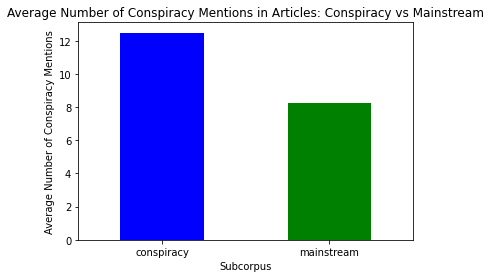

In [85]:
# Grouping the data by 'subcorpus' and calculating the mean of 'No. times consp mentioned'
grouped_data = df_sample_mention_consp.groupby('subcorpus')['No. times consp mentioned'].mean()

# Plotting
grouped_data.plot(kind='bar', color=['blue', 'green'])
plt.title('Average Number of Conspiracy Mentions in Articles: Conspiracy vs Mainstream')
plt.xlabel('Subcorpus')
plt.ylabel('Average Number of Conspiracy Mentions')
plt.xticks(rotation=0)  # Rotate labels to make them readable
plt.show()


# Excessive usage of 1st and 2nd person pronoun usage

In [62]:
a

In [63]:
df_LOCO_test.head()

,doc_id,URL,website,seeds,date,subcorpus,title,txt,txt_nwords,txt_nsentences,...,cosine_similarity,FB_shares,FB_comments,FB_reactions,cap_ratio,punct_ratio,avg_sentence_length,num_questions,first_person_count,second_person_count
0,C0020a,https://www.healthnutnews.com/robert-f-kennedy...,healthnutnews.com,big.pharma,2019-02-07,conspiracy,Robert F. Kennedy Jr explains how Big Pharma c...,"For many years, Robert F. Kennedy Jr. has been...",695,34,...,0.2037,2191.0,488.0,4350.0,0.014903,0.020957,20.441176,1,20,1
1,C04122,https://www.newstarget.com/2018-03-11-world-he...,newstarget.com,zika.virus,2018-03-11,conspiracy,World health chief stokes the panic fires by w...,World health chief stokes the panic fires by w...,613,30,...,0.1347,0.0,0.0,0.0,0.011647,0.026933,20.433333,1,6,0
2,C05120,https://www.healthnutnews.com/court-awards-969...,healthnutnews.com,vaccine,2015-02-09,conspiracy,"Court Awards $969,474 for MMR Vaccine Causing ...",Do vaccines cause autism? Many parents think s...,624,37,...,0.1158,5.0,0.0,2.0,0.013072,0.021919,16.864865,4,1,10
3,C0074b,https://geopolitics.co/2014/12/27/meet-the-pil...,geopolitics.co,mh370,2014-12-27,conspiracy,Meet The Pilot Who Shot Down Malaysian Boeing ...,"Normally, those pawns are to be eliminated lat...",1914,217,...,0.1837,0.0,0.0,0.0,0.020523,0.028181,8.820276,49,27,19
4,C04fca,https://vigilantcitizen.com/latestnews/megadet...,vigilantcitizen.com,new.world.order,2012-04-09,conspiracy,"Megadeth's ""New World Order"" and ""We the Peopl...",The iconic heavy metal band Megadeth never shi...,499,48,...,0.1581,0.0,0.0,0.0,0.002037,0.015212,10.395833,2,15,11


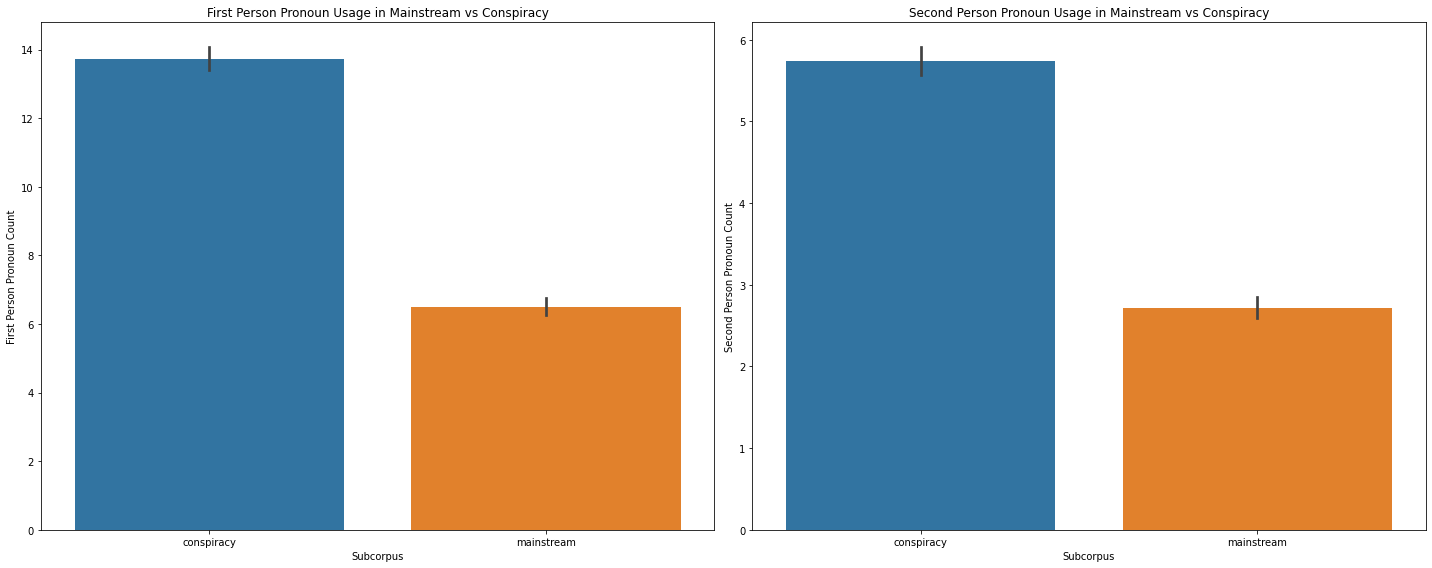

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# First Person Pronoun Usage in Mainstream vs Conspiracy
sns.barplot(x='subcorpus', y='first_person_count', data=df_LOCO_test, ax=axes[0])
axes[0].set_title('First Person Pronoun Usage in Mainstream vs Conspiracy')
axes[0].set_xlabel('Subcorpus')
axes[0].set_ylabel('First Person Pronoun Count')

# Second Person Pronoun Usage in Mainstream vs Conspiracy
sns.barplot(x='subcorpus', y='second_person_count', data=df_LOCO_test, ax=axes[1])
axes[1].set_title('Second Person Pronoun Usage in Mainstream vs Conspiracy')
axes[1].set_xlabel('Subcorpus')
axes[1].set_ylabel('Second Person Pronoun Count')

# Adjust layout for better visibility
plt.tight_layout()

# Show the plots
plt.show()

**This trait is again confirmed** 

# 5)	Sensationalism used to excite emotion

**Loading in the latent feature dataframe to do this final comparative check before moving onto deep learning**

In [4]:
df_LOCO_LF = pd.read_json('LOCO_LFs.json')
df_LOCO_LF.head()

,doc_id,LIWC_WC,LIWC_Analytic,LIWC_Clout,LIWC_Authentic,LIWC_Tone,LIWC_WPS,LIWC_Sixltr,LIWC_Dic,LIWC_function,...,Empath_weapon,Empath_children,Empath_monster,Empath_ocean,Empath_giving,Empath_contentment,Empath_writing,Empath_rural,Empath_positive_emotion,Empath_musical
0,C00001,4051,88.89,76.97,13.98,5.22,22.26,27.18,79.26,46.63,...,0.0007,0.0089,0.0007,0.0002,0.0032,0.0,0.0030,0.0022,0.0027,0.0010
1,C00003,929,99.00,68.20,10.45,37.18,14.29,31.11,61.03,35.20,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0297,0.0011,0.0011,0.0191
2,C00004,706,90.03,53.40,29.13,25.77,30.70,26.91,75.07,44.05,...,0.0000,0.0000,0.0000,0.0000,0.0014,0.0,0.0043,0.0000,0.0072,0.0029
3,C00005,4989,95.62,63.26,13.75,22.05,24.10,27.58,74.14,42.17,...,0.0021,0.0016,0.0012,0.0002,0.0014,0.0,0.0037,0.0018,0.0012,0.0002
4,C00007,387,30.31,93.94,9.63,73.97,29.77,12.66,86.82,57.36,...,0.0026,0.0026,0.0000,0.0000,0.0052,0.0,0.0000,0.0000,0.0078,0.0000


In [24]:
df_sample_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96743 entries, 0 to 96742
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   doc_id       96743 non-null  object 
 1   URL          96743 non-null  object 
 2   subcorpus    96743 non-null  object 
 3   title        96743 non-null  object 
 4   txt          96743 non-null  object 
 5   cap_ratio    96743 non-null  float64
 6   punct_ratio  96743 non-null  float64
dtypes: float64(2), object(5)
memory usage: 5.2+ MB


In [5]:
df_LOCO_test_lf = pd.merge(df_LOCO_test, df_LOCO_LF, on = 'doc_id', how = 'left')
df_LOCO_test_lf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 39999
Columns: 307 entries, doc_id to Empath_musical
dtypes: datetime64[ns](1), float64(291), int64(5), object(10)
memory usage: 94.0+ MB


# LIWC analysis

LIWC_affect: Measures the overall emotional tone of the text, capturing both positive and negative emotions.


LIWC_posemo: Represents positive emotions, indicating content that may be trying to evoke optimism or happiness in an exaggerated manner.


LIWC_negemo: Represents negative emotions, which are often used in sensationalist content to provoke fear, anger, or sadness.


LIWC_anx: Measures the presence of anxiety-related words, which can be a component of sensationalist messaging aimed at provoking stress or worry.


LIWC_anger: Indicates the use of language associated with anger, which can be prevalent in sensational content designed to incite outrage.


LIWC_sad: Reflects the usage of sadness-related words, potentially used to evoke sympathy or emotional distress.

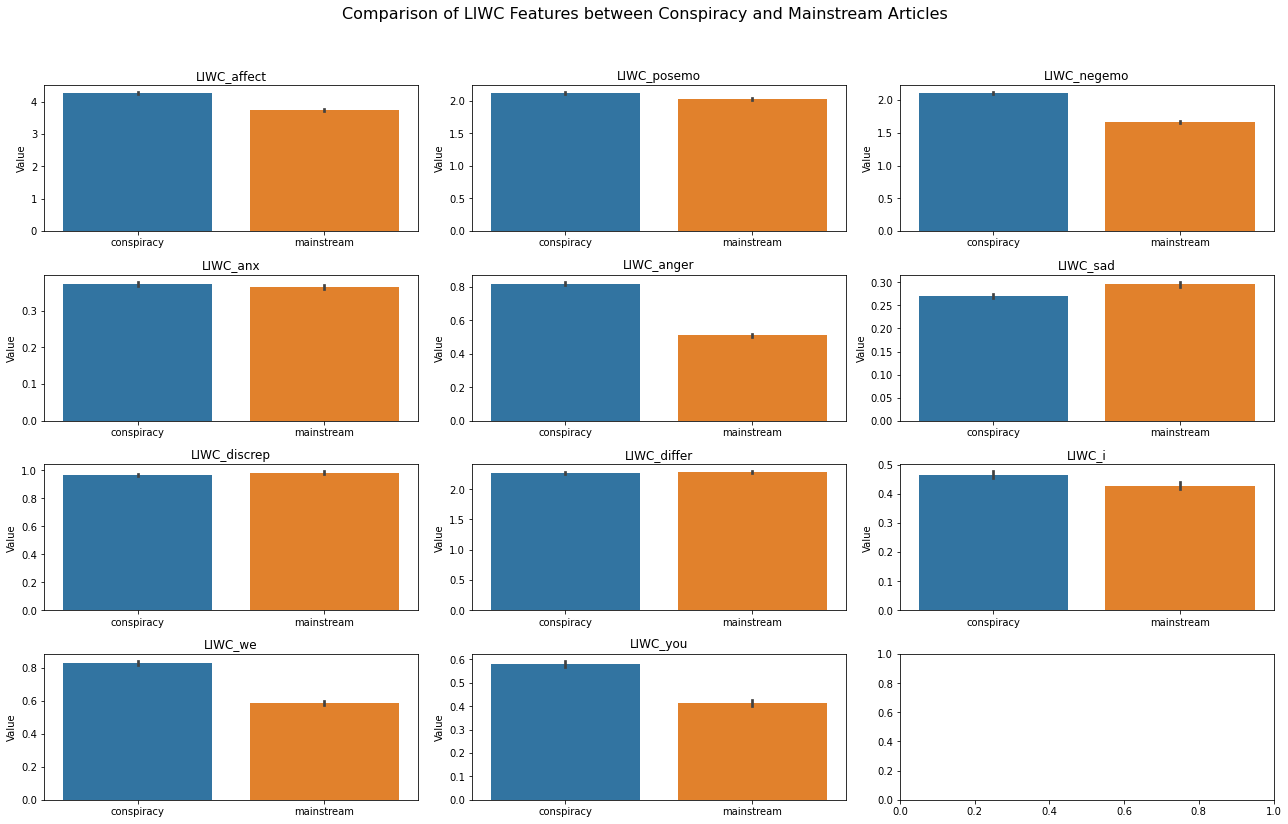

In [6]:
liwc_features = ['LIWC_affect', 'LIWC_posemo', 'LIWC_negemo', 'LIWC_anx', 'LIWC_anger', 'LIWC_sad',
                'LIWC_discrep', 'LIWC_differ', 'LIWC_i', 'LIWC_we', 'LIWC_you']

# Plotting
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 12))
for i, feature in enumerate(liwc_features):
    sns.barplot(x='subcorpus', y=feature, data=df_LOCO_test_lf, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(feature)
    axes[i//3, i%3].set_xlabel('')
    axes[i//3, i%3].set_ylabel('Value')

fig.suptitle('Comparison of LIWC Features between Conspiracy and Mainstream Articles', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rect to make space for the suptitle

plt.show()

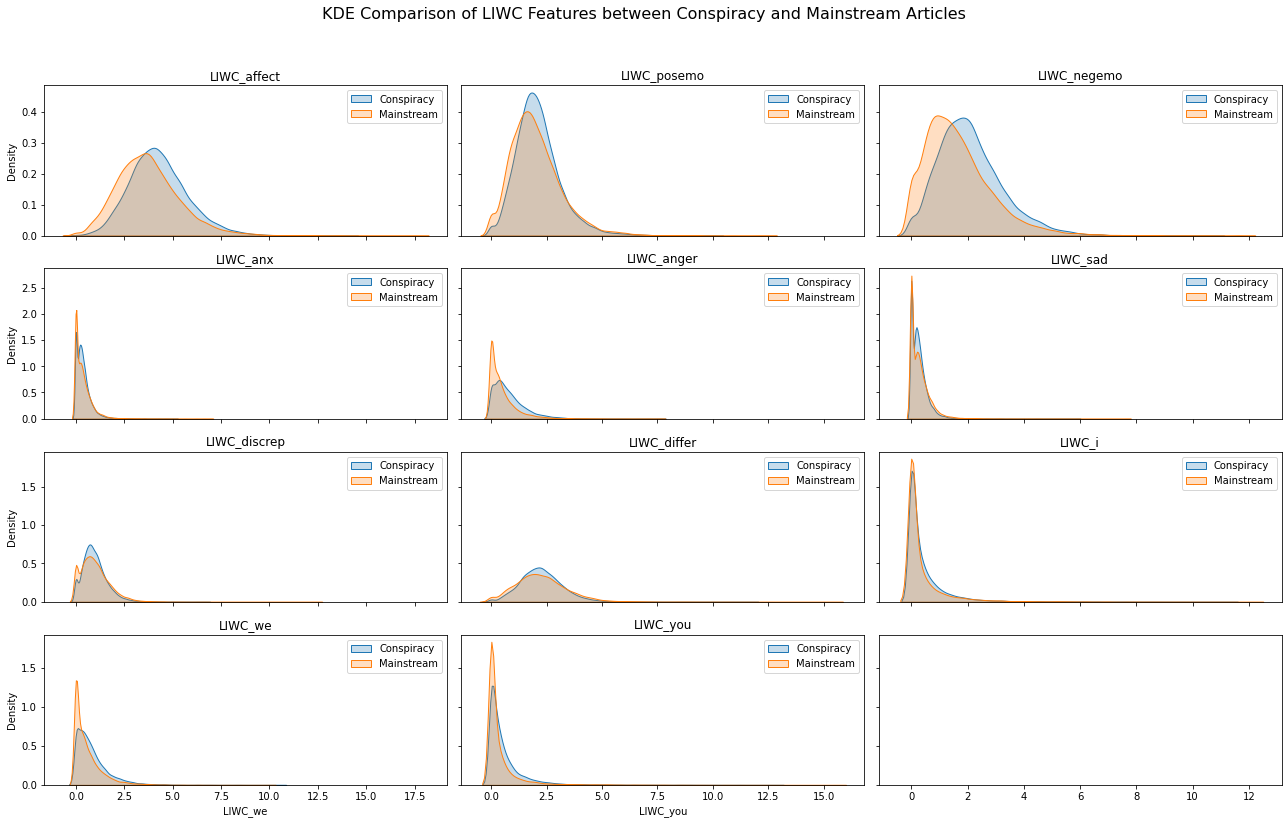

In [110]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 12), sharex='col', sharey='row')

for i, feature in enumerate(liwc_features):
    sns.kdeplot(data=df_LOCO_test_lf[df_LOCO_test_lf['subcorpus'] == 'conspiracy'][feature], 
                ax=axes[i//3, i%3], label='Conspiracy', shade=True)
    sns.kdeplot(data=df_LOCO_test_lf[df_LOCO_test_lf['subcorpus'] == 'mainstream'][feature], 
                ax=axes[i//3, i%3], label='Mainstream', shade=True)
    axes[i//3, i%3].set_title(feature)
    axes[i//3, i%3].legend()

fig.suptitle('KDE Comparison of LIWC Features between Conspiracy and Mainstream Articles', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rect to make space for the suptitle

plt.show()

In [7]:
from scipy.stats import ttest_ind

t_test_results = {}

# Perform t-tests for each LIWC feature
for feature in liwc_features:
    conspiracy_scores = df_LOCO_test_lf[df_LOCO_test_lf['subcorpus'] == 'conspiracy'][feature]
    mainstream_scores = df_LOCO_test_lf[df_LOCO_test_lf['subcorpus'] == 'mainstream'][feature]
    
    # Perform the t-test and store the result~
    t_test_results[feature] = ttest_ind(conspiracy_scores, mainstream_scores)

# Display the results in a clear format
t_test_results_df = pd.DataFrame.from_dict(t_test_results, orient='index', columns=['t-statistic', 'p-value'])

t_test_results_df

,t-statistic,p-value
LIWC_affect,33.515270,6.741966e-243
LIWC_posemo,8.630471,6.331177e-18
LIWC_negemo,36.306561,5.344604e-284
LIWC_anx,1.933967,5.312425e-02
LIWC_anger,42.992629,0.000000e+00
LIWC_sad,-7.479464,7.615190e-14
LIWC_discrep,-1.848739,6.450282e-02
LIWC_differ,-0.935821,3.493712e-01
LIWC_i,4.152007,3.302539e-05
LIWC_we,29.674022,1.993631e-191


Positive values here indicate a higher average for the conspiracy value accross the board for the conspiracy v mainstream

# Empath analysis

Empath_hate: Captures expressions of hate, which could be sensational or provocative.

Empath_aggression: Reflects aggressive behavior or language, common in sensationalistic narratives.

Empath_anger: Similar to LIWC's anger dimension but potentially broader, capturing more contextual forms of anger.

Empath_neglect: Might indicate content that plays on fears of being overlooked or mistreated, which can be a sensational angle.

Empath_suffering: Reflects language related to suffering, which can be used to evoke strong empathetic responses.

Empath_fear: Directly measures expressions of fear, a powerful emotional trigger in sensational content.

Empath_disgust: Indicates expressions of disgust, which can be used to evoke strong negative reactions.

Empath_negative_emotion: A broad measure of negative emotional content, likely prevalent in sensationalism to evoke a strong reaction.

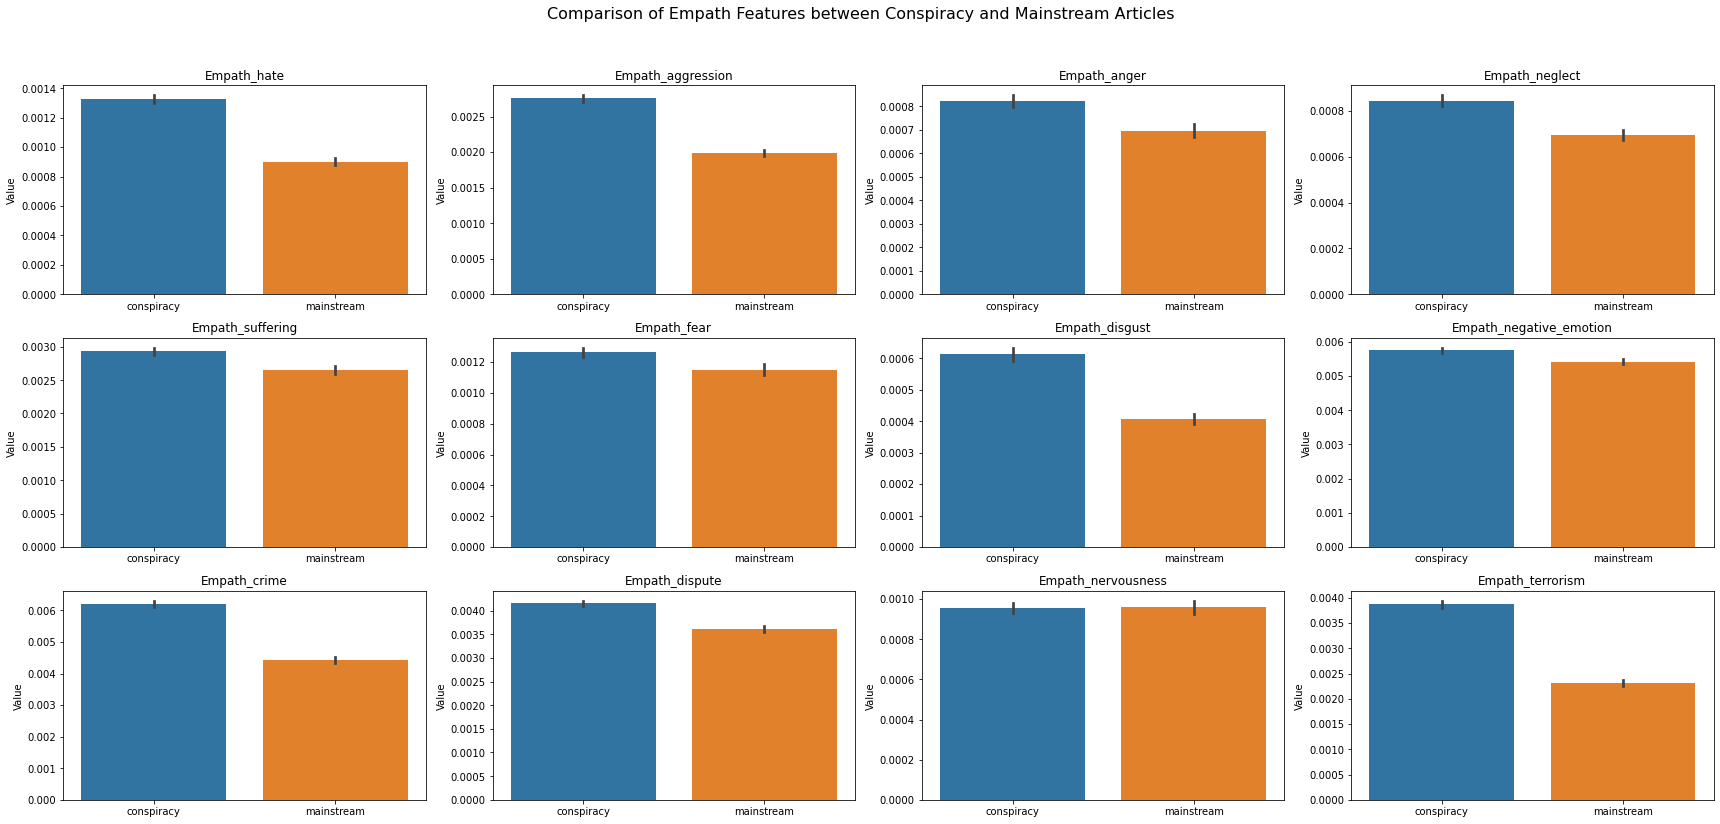

In [112]:
empath_features = [
    'Empath_hate', 'Empath_aggression', 'Empath_anger', 'Empath_neglect',
    'Empath_suffering', 'Empath_fear', 'Empath_disgust', 'Empath_negative_emotion',
    'Empath_crime', 'Empath_dispute', 'Empath_nervousness', 'Empath_terrorism']
# Plotting bar plots for each Empath feature
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(24, 12))
for i, feature in enumerate(empath_features):
    sns.barplot(x='subcorpus', y=feature, data=df_LOCO_test_lf, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(feature)
    axes[i//4, i%4].set_xlabel('')
    axes[i//4, i%4].set_ylabel('Value')

fig.suptitle('Comparison of Empath Features between Conspiracy and Mainstream Articles', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

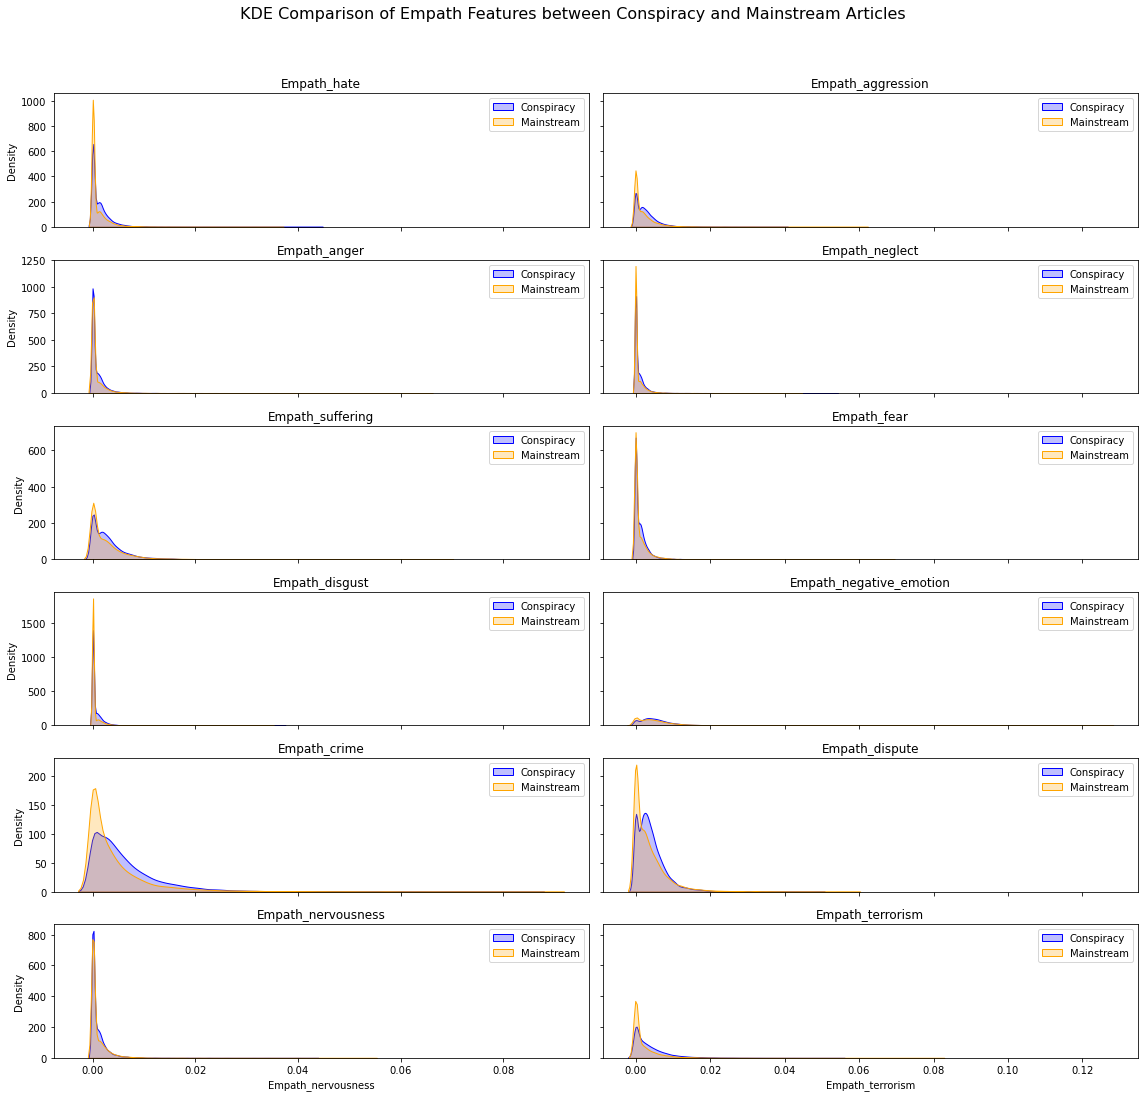

In [104]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(16, 16), sharex='col', sharey='row')  # Increased figsize

for i, feature in enumerate(empath_features):
    sns.kdeplot(data=df_LOCO_test_lf[df_LOCO_test_lf['subcorpus'] == 'conspiracy'][feature], 
                ax=axes[i//2, i%2], label='Conspiracy', shade=True, color="blue")
    sns.kdeplot(data=df_LOCO_test_lf[df_LOCO_test_lf['subcorpus'] == 'mainstream'][feature], 
                ax=axes[i//2, i%2], label='Mainstream', shade=True, color="orange")
    axes[i//2, i%2].set_title(feature)
    axes[i//2, i%2].legend()

fig.suptitle('KDE Comparison of Empath Features between Conspiracy and Mainstream Articles', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rect to make space for the suptitle

# Display the plots
plt.show()


In [105]:
# Perform t-tests for each Empath feature and store the results.
t_test_results_empath = {}

for feature in empath_features:
    conspiracy_scores = df_LOCO_test_lf[df_LOCO_test_lf['subcorpus'] == 'conspiracy'][feature]
    mainstream_scores = df_LOCO_test_lf[df_LOCO_test_lf['subcorpus'] == 'mainstream'][feature]
    
    # Perform the t-test and store the result
    t_test_results_empath[feature] = ttest_ind(conspiracy_scores, mainstream_scores)

# Convert the t-test results to a DataFrame
t_test_results_empath_df = pd.DataFrame.from_dict(t_test_results_empath, orient='index', columns=['t-statistic', 'p-value'])


t_test_results_empath_df


,t-statistic,p-value
Empath_hate,21.677006,1.337760e-103
Empath_aggression,24.047873,7.015936e-127
Empath_anger,6.704874,2.042545e-11
Empath_neglect,8.778400,1.722433e-18
Empath_suffering,7.020182,2.251030e-12
Empath_fear,4.678639,2.897296e-06
Empath_disgust,15.835160,2.640905e-56
Empath_negative_emotion,6.345070,2.246984e-10
Empath_crime,25.469447,5.847433e-142
Empath_dispute,11.971175,5.728666e-33


# X) Comparing Facebook engagement

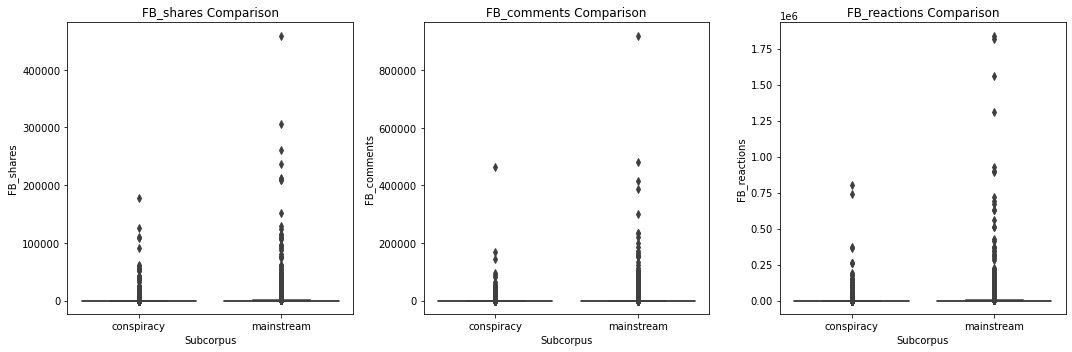

In [106]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Create comparative plots for FB_shares, FB_comments, FB_reactions
for i, metric in enumerate(['FB_shares', 'FB_comments', 'FB_reactions']):
    sns.boxplot(x='subcorpus', y=metric, data=df_LOCO_test, ax=axes[i])
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_xlabel('Subcorpus')
    axes[i].set_ylabel(metric)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()